In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvid = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/day%201/MVID_101001_171001.txt')

In [3]:
sber = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/day%201/SBER_101001_171001.txt')

In [4]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [5]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [6]:
sber.describe()

,<DATE>,<TIME>,<CLOSE>,<VOL>
count,1.758000e+03,1758.0,1758.000000,1.758000e+03
mean,2.013818e+07,0.0,103.127878,1.206129e+08
std,2.043505e+04,0.0,30.083143,8.364783e+07
min,2.010100e+07,0.0,53.500000,1.409153e+07
25%,2.012070e+07,0.0,81.985000,6.452312e+07
50%,2.014040e+07,0.0,96.025000,9.901520e+07
75%,2.016010e+07,0.0,106.892500,1.505951e+08
max,2.017100e+07,0.0,193.700000,6.190570e+08


In [7]:
sber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [8]:
mvid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [9]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [10]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

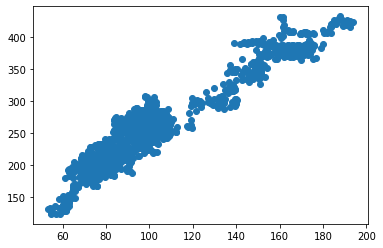

In [12]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [89]:
class linear_regression():
  def __init__(self):
    self.b0 = 0
    self.b1 = 0

  def predict(self, x):
    return self.b0 + self.b1 * x

  def error(self, x, y):
    return sum((self.predict(x) - y) ** 2) / (2 * len(y))

  def gd(self, x, y):
    steps, errors = [], []
    alpha = 0.000001
    step = 0
    old_err = self.error(x, y)
    dJ = 1
    while dJ > 0.1:
      step += 1 

      dJ0 = sum(self.predict(x) - y) / len(y)
      dJ1 = sum((self.predict(x) - y) * x) / len(y)

      self.b0 = self.b0 - alpha * dJ0
      self.b1 = self.b1 - alpha * dJ1

      new_err = self.error(x, y)
      dJ = abs(new_err - old_err)

      old_err = new_err

      steps.append(step)
      errors.append(new_err)
    
    return steps, errors

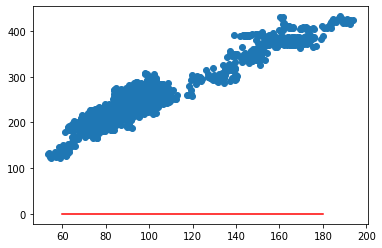

In [90]:
h = linear_regression()

x0 = np.linspace(60, 180, 100)
y0 = h.predict(x0)

plt.figure()
plt.scatter(x, y)
plt.plot(x0, y0, c='r')
plt.show()

36271.58344889084
302.9019681557182


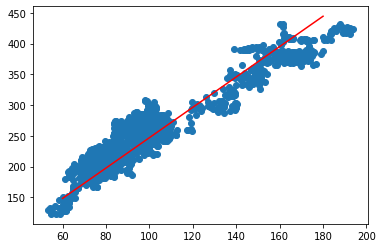

In [91]:
print(h.error(x, y))
steps, errors = h.gd(x, y)
print(h.error(x, y))

x0 = np.linspace(60, 180, 100)
y0 = h.predict(x0)

plt.figure()
plt.scatter(x, y)
plt.plot(x0, y0, c='r')
plt.show()

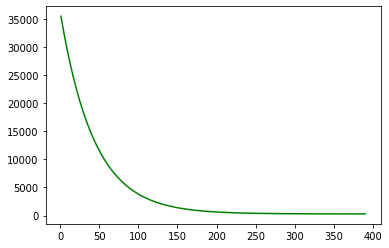

In [92]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
h = LinearRegression()

In [96]:
x = pd.DataFrame(x)

In [97]:
h.fit(x, y)

LinearRegression()

In [99]:
h.coef_

array([1.99635191])

In [101]:
h.score(x, y)

0.9111046169982557

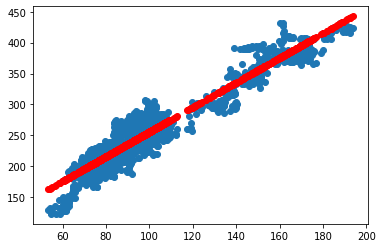

In [103]:
Y0 = h.predict(x)
 
plt.figure()
plt.scatter(x, y)
plt.scatter(x, Y0, c='r')
plt.show()